# Exploratory Data analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import scipy
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the HVAC Energy Dataset and parse the timestamp column
df = pd.read_csv('dataset/HVAC Energy Data.csv')
df_normalized = pd.read_csv('dataset/HVAC Energy Data Cleaned and Split.csv')
timestamp_column = 'Local Time (Timezone : GMT+8h)'
df[timestamp_column] = pd.to_datetime(df[timestamp_column])
df = df.set_index(timestamp_column)

## Correlation Analysis


Correlation with Chiller Energy Consumption:
Chiller Energy Consumption (kWh)    1.000000
Building Load (RT)                  0.916169
Chilled Water Rate (L/sec)          0.846400
Outside Temperature (F)             0.558136
Wind Speed (mph)                    0.423824
Cooling Water Temperature (C)       0.308357
Dew Point (F)                      -0.134784
Pressure (in)                      -0.146391
Humidity (%)                       -0.537755
Name: Chiller Energy Consumption (kWh), dtype: float64


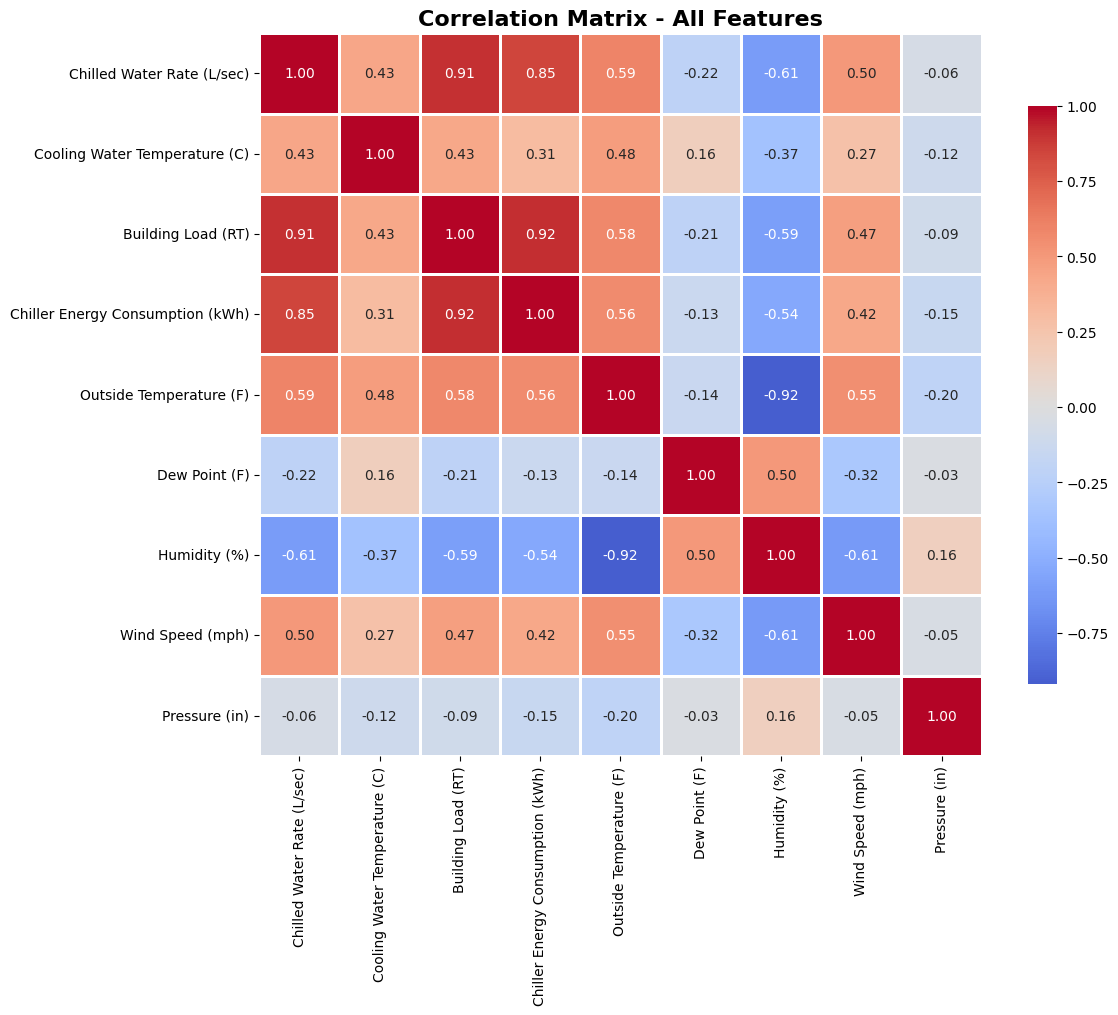


Key Findings:
Features with strong correlation (|r| > 0.5) to Energy Consumption:
  - Chilled Water Rate (L/sec): 0.846
  - Building Load (RT): 0.916
  - Outside Temperature (F): 0.558
  - Humidity (%): -0.538


In [24]:
# Calculate correlation matrix for all numeric features
correlation_matrix = df.corr()

print("\nCorrelation with Chiller Energy Consumption:")
print(correlation_matrix['Chiller Energy Consumption (kWh)'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations with energy consumption
print("\nKey Findings:")
energy_corr = correlation_matrix['Chiller Energy Consumption (kWh)'].drop('Chiller Energy Consumption (kWh)')
strong_corr = energy_corr[abs(energy_corr) > 0.5]
print(f"Features with strong correlation (|r| > 0.5) to Energy Consumption:")
for feature, corr_value in strong_corr.items():
    print(f"  - {feature}: {corr_value:.3f}")

## Time series analysis of Energy Consumption

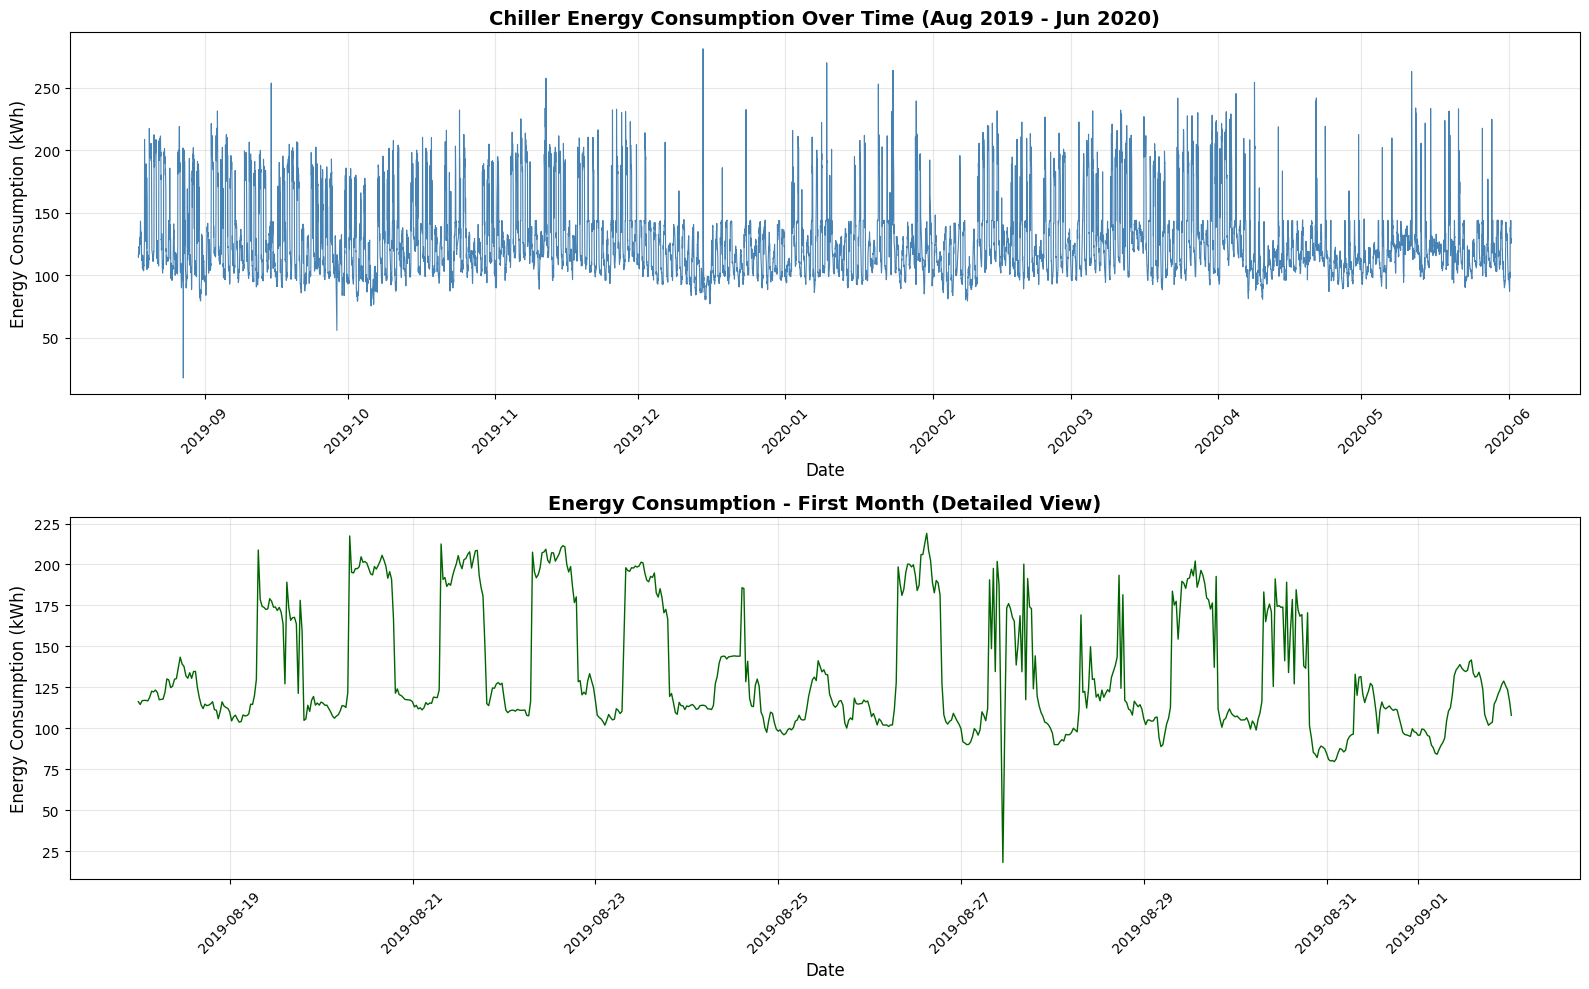


Energy Consumption Statistics:
  Mean: 126.81 kWh
  Median: 118.10 kWh
  Std Dev: 30.16 kWh
  Min: 18.00 kWh
  Max: 281.20 kWh
  Range: 263.20 kWh


In [25]:
# Plot overall energy consumption over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full time series
axes[0].plot(df.index, df['Chiller Energy Consumption (kWh)'], color='steelblue', linewidth=0.8)
axes[0].set_title('Chiller Energy Consumption Over Time (Aug 2019 - Jun 2020)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Zoomed view: First month
first_month = df.iloc[:30*24]  # First 30 days (assuming hourly data)
axes[1].plot(first_month.index, first_month['Chiller Energy Consumption (kWh)'],
             color='darkgreen', linewidth=1)
axes[1].set_title('Energy Consumption - First Month (Detailed View)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary of energy consumption
print("\nEnergy Consumption Statistics:")
print(f"  Mean: {df['Chiller Energy Consumption (kWh)'].mean():.2f} kWh")
print(f"  Median: {df['Chiller Energy Consumption (kWh)'].median():.2f} kWh")
print(f"  Std Dev: {df['Chiller Energy Consumption (kWh)'].std():.2f} kWh")
print(f"  Min: {df['Chiller Energy Consumption (kWh)'].min():.2f} kWh")
print(f"  Max: {df['Chiller Energy Consumption (kWh)'].max():.2f} kWh")
print(f"  Range: {df['Chiller Energy Consumption (kWh)'].max() - df['Chiller Energy Consumption (kWh)'].min():.2f} kWh")

## Temperature and Load Patterns

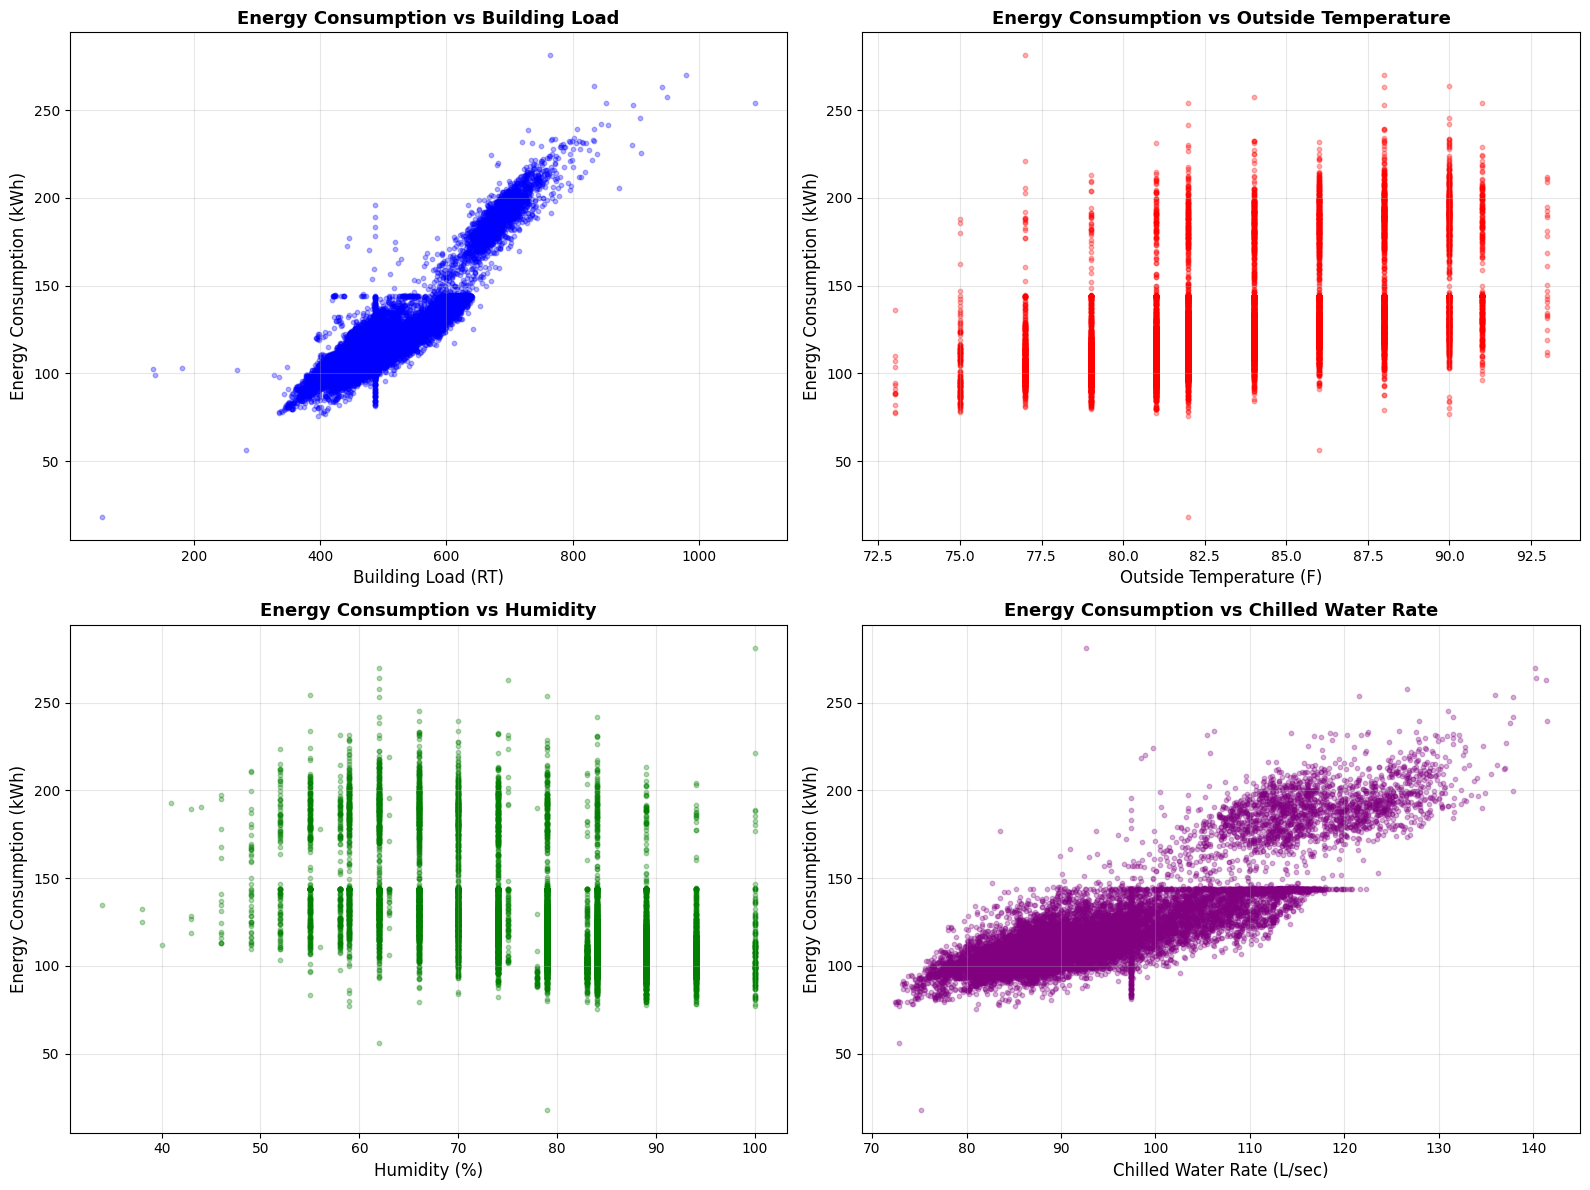

In [26]:
# Create scatter plots to understand relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Energy vs Building Load
axes[0, 0].scatter(df['Building Load (RT)'], df['Chiller Energy Consumption (kWh)'],
                   alpha=0.3, c='blue', s=10)
axes[0, 0].set_xlabel('Building Load (RT)', fontsize=12)
axes[0, 0].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[0, 0].set_title('Energy Consumption vs Building Load', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Energy vs Outside Temperature
axes[0, 1].scatter(df['Outside Temperature (F)'], df['Chiller Energy Consumption (kWh)'],
                   alpha=0.3, c='red', s=10)
axes[0, 1].set_xlabel('Outside Temperature (F)', fontsize=12)
axes[0, 1].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[0, 1].set_title('Energy Consumption vs Outside Temperature', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Energy vs Humidity
axes[1, 0].scatter(df['Humidity (%)'], df['Chiller Energy Consumption (kWh)'],
                   alpha=0.3, c='green', s=10)
axes[1, 0].set_xlabel('Humidity (%)', fontsize=12)
axes[1, 0].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[1, 0].set_title('Energy Consumption vs Humidity', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Energy vs Chilled Water Rate
axes[1, 1].scatter(df['Chilled Water Rate (L/sec)'], df['Chiller Energy Consumption (kWh)'],
                   alpha=0.3, c='purple', s=10)
axes[1, 1].set_xlabel('Chilled Water Rate (L/sec)', fontsize=12)
axes[1, 1].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[1, 1].set_title('Energy Consumption vs Chilled Water Rate', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Distribution Analysis

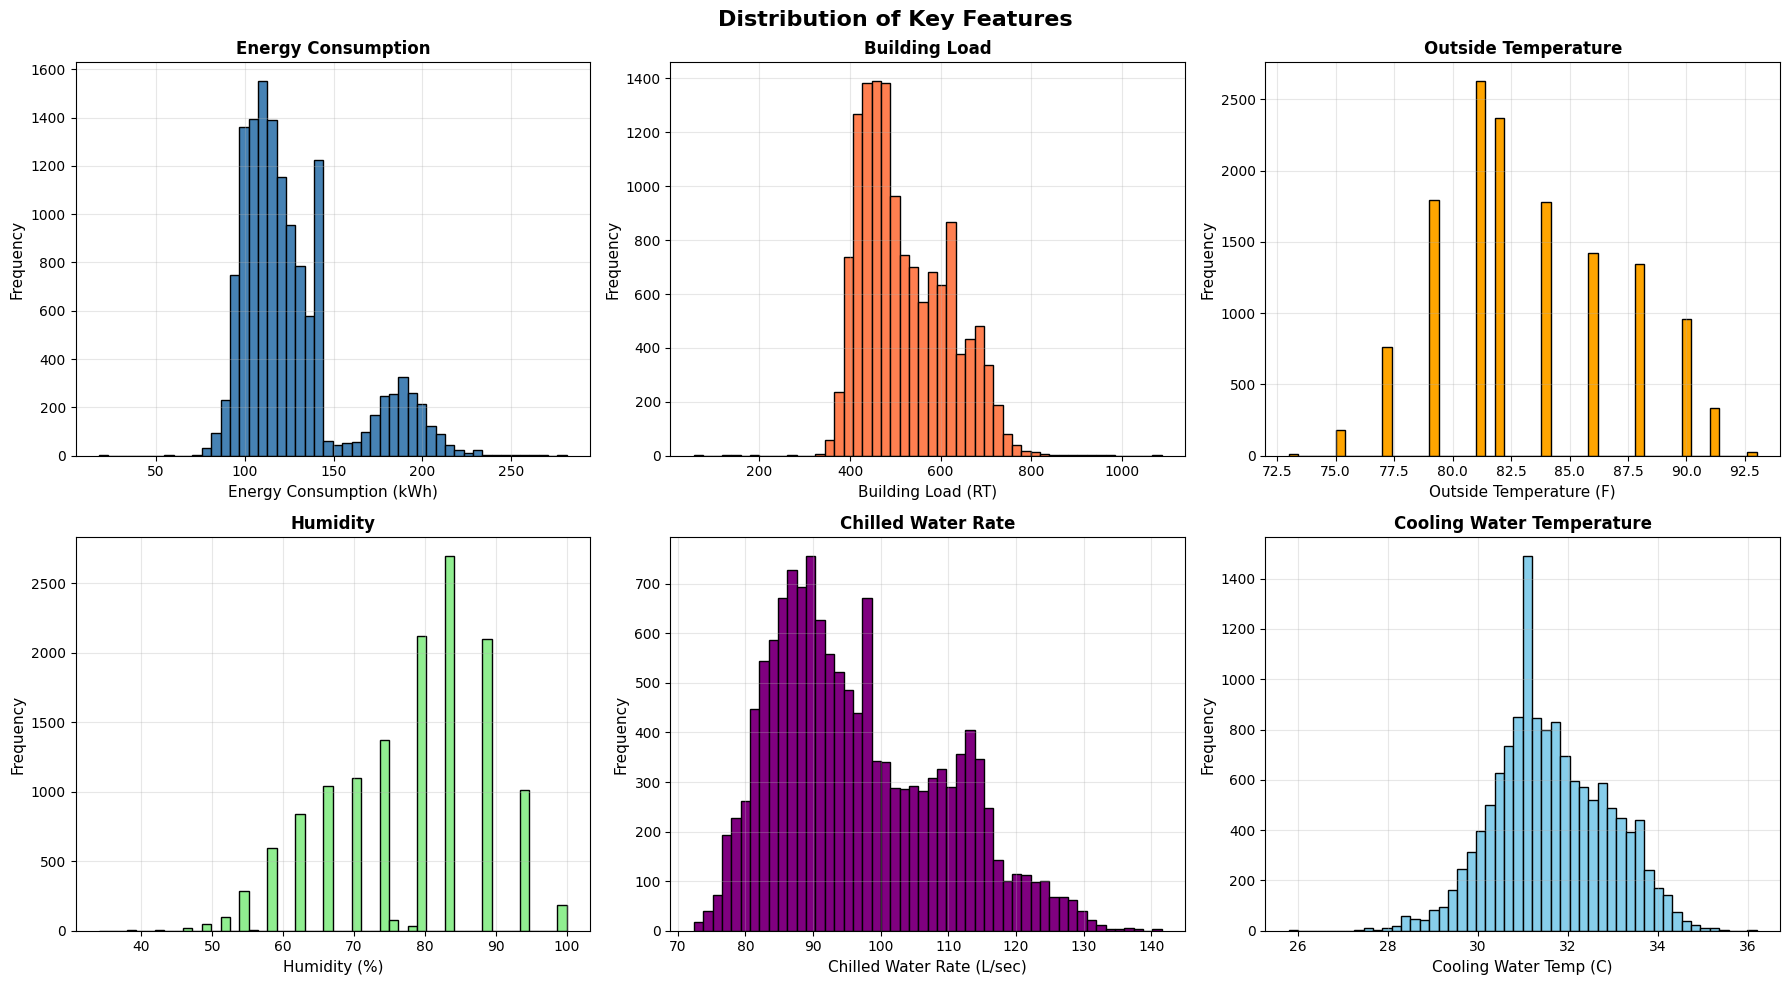

In [27]:
# Create distribution plots for key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')

# Energy Consumption Distribution
axes[0, 0].hist(df['Chiller Energy Consumption (kWh)'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Energy Consumption (kWh)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Energy Consumption', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Building Load Distribution
axes[0, 1].hist(df['Building Load (RT)'], bins=50, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Building Load (RT)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Building Load', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Outside Temperature Distribution
axes[0, 2].hist(df['Outside Temperature (F)'], bins=50, color='orange', edgecolor='black')
axes[0, 2].set_xlabel('Outside Temperature (F)', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_title('Outside Temperature', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Humidity Distribution
axes[1, 0].hist(df['Humidity (%)'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Humidity (%)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Humidity', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Chilled Water Rate Distribution
axes[1, 1].hist(df['Chilled Water Rate (L/sec)'], bins=50, color='purple', edgecolor='black')
axes[1, 1].set_xlabel('Chilled Water Rate (L/sec)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Chilled Water Rate', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Cooling Water Temperature Distribution
axes[1, 2].hist(df['Cooling Water Temperature (C)'], bins=50, color='skyblue', edgecolor='black')
axes[1, 2].set_xlabel('Cooling Water Temp (C)', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].set_title('Cooling Water Temperature', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Temporal Patterns - Hourly and Daily Analysis

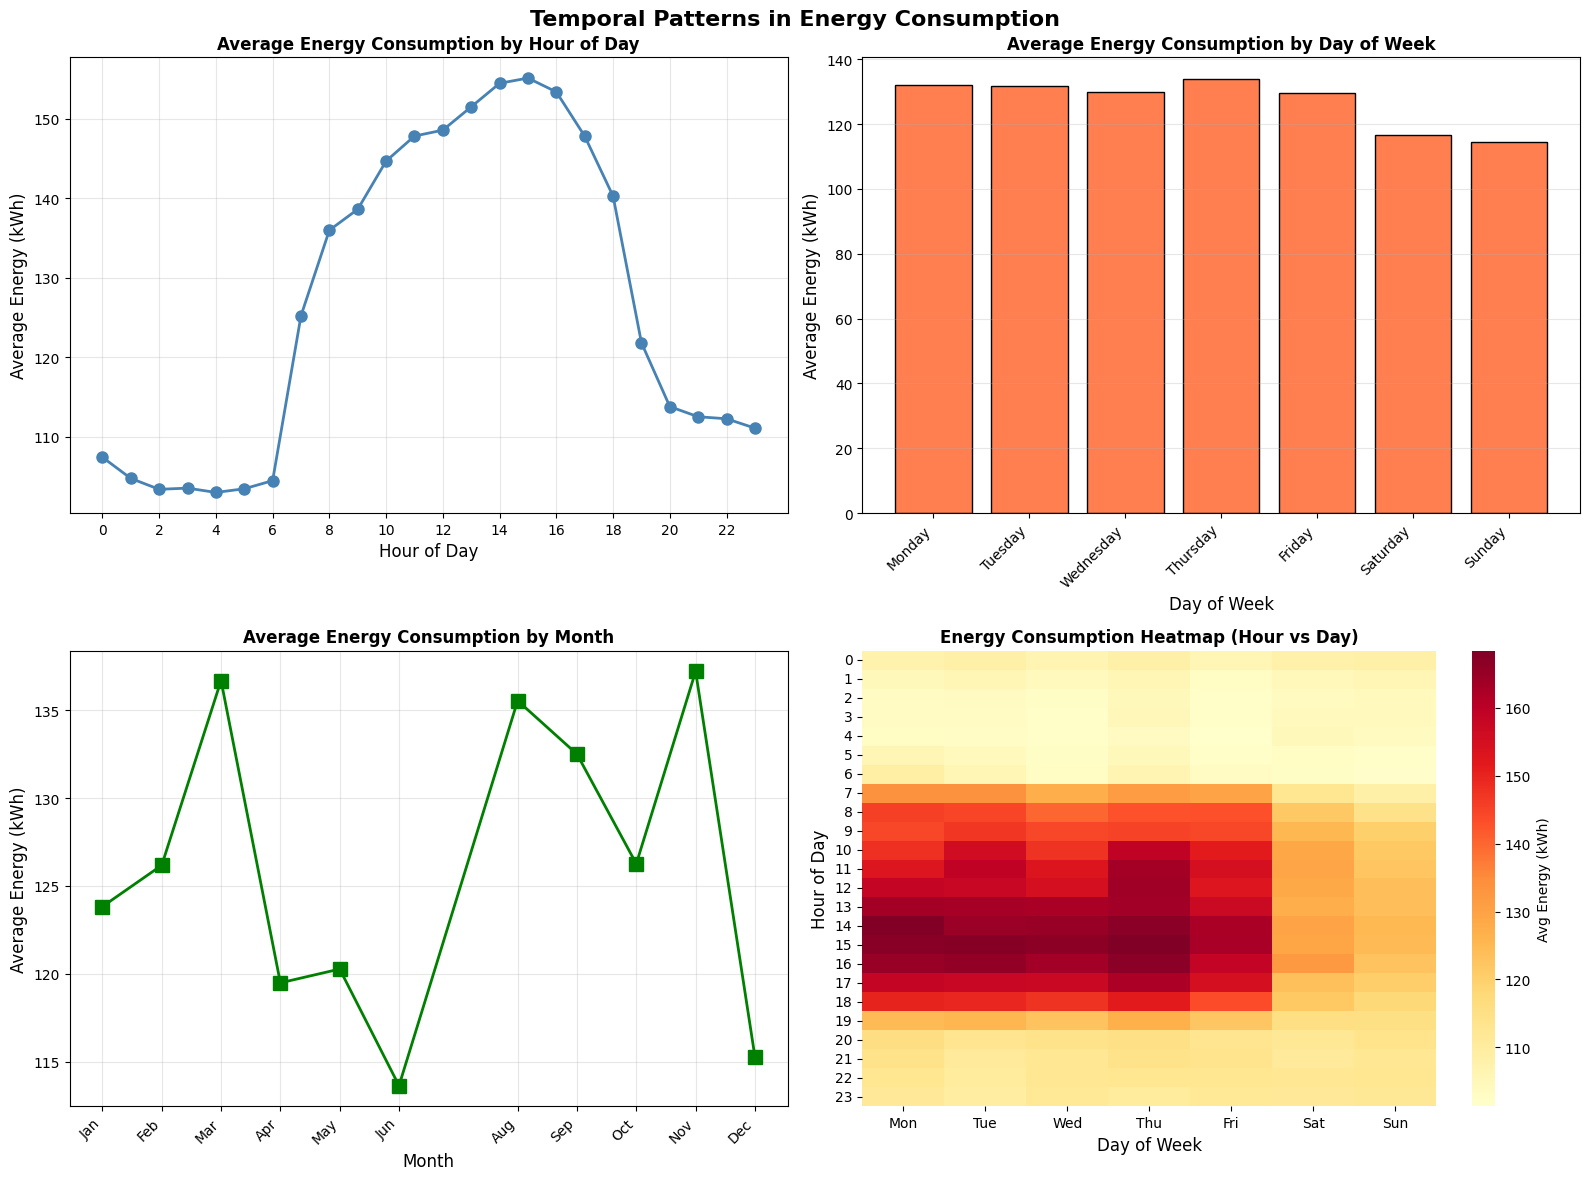


Key Temporal Insights:
  Peak hour: Hour 15 with avg 155.09 kWh
  Lowest hour: Hour 4 with avg 103.01 kWh
  Peak day: Thursday with avg 133.88 kWh
  Lowest day: Sunday with avg 114.33 kWh


In [28]:
# Extract hour and day of week from index
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df.index.month

# Calculate average energy consumption by hour of day
hourly_avg = df.groupby('Hour')['Chiller Energy Consumption (kWh)'].mean()

# Calculate average energy consumption by day of week
daily_avg = df.groupby('DayOfWeek')['Chiller Energy Consumption (kWh)'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average energy consumption by month
monthly_avg = df.groupby('Month')['Chiller Energy Consumption (kWh)'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualize temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Patterns in Energy Consumption', fontsize=16, fontweight='bold')

# Hourly pattern
axes[0, 0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Average Energy (kWh)', fontsize=12)
axes[0, 0].set_title('Average Energy Consumption by Hour of Day', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Daily pattern
axes[0, 1].bar(range(7), daily_avg.values, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Average Energy (kWh)', fontsize=12)
axes[0, 1].set_title('Average Energy Consumption by Day of Week', fontweight='bold')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Monthly pattern
months_in_data = sorted(df['Month'].unique())
month_labels = [month_names[m-1] for m in months_in_data]
axes[1, 0].plot(months_in_data, [monthly_avg[m] for m in months_in_data],
                marker='s', linewidth=2, markersize=10, color='green')
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Average Energy (kWh)', fontsize=12)
axes[1, 0].set_title('Average Energy Consumption by Month', fontweight='bold')
axes[1, 0].set_xticks(months_in_data)
axes[1, 0].set_xticklabels(month_labels, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# Heatmap: Hour vs Day of Week
pivot_table = df.pivot_table(values='Chiller Energy Consumption (kWh)',
                              index='Hour', columns='DayOfWeek', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Avg Energy (kWh)'})
axes[1, 1].set_xlabel('Day of Week', fontsize=12)
axes[1, 1].set_ylabel('Hour of Day', fontsize=12)
axes[1, 1].set_title('Energy Consumption Heatmap (Hour vs Day)', fontweight='bold')
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

# Print insights
print("\nKey Temporal Insights:")
print(f"  Peak hour: Hour {hourly_avg.idxmax()} with avg {hourly_avg.max():.2f} kWh")
print(f"  Lowest hour: Hour {hourly_avg.idxmin()} with avg {hourly_avg.min():.2f} kWh")
print(f"  Peak day: {day_names[daily_avg.idxmax()]} with avg {daily_avg.max():.2f} kWh")
print(f"  Lowest day: {day_names[daily_avg.idxmin()]} with avg {daily_avg.min():.2f} kWh")